# Investing in Human Capital: The Key to Economic Growth - Insights from the Solow Model

**Motivation for our model project**

Investment in human capital has been shown to have a potential cross effect on physical capital investment, as an increase in investment in human capital can lead to a rise in the productivity of workers, leading to a larger income, which in turn can stimulate investment in physical capital. To investigate this relationship and its implications for economic growth, we need to first solve the basic Solow model, which only considers physical capital, and then extend it to incorporate human capital.

By developing the Solow model with human capital, we can gain a more complete understanding of the relationship between human and physical capital and how investment in these two factors can promote sustainable economic growth. This can contribute with insights beneficial for policy design.

Imports and set magics:

In [1]:
## Importing necessary libraries
import numpy as np
import sympy as sm
from scipy import optimize
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets

## For better looking output
sm.init_printing(use_unicode=True)

## Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# The Basic Solow Model

The basic Solow model consists of production, labour, capital, a rate on labour (wage) and a rate on capital (interest). Furthermore the model is dynamic, meaning that levels in the economy in a period t is determined and influenced by levels in period t-1. Below we list the equations included in the basic Solow model in discrete time as specified in chapter 3 of Introduction to Advanced Macroeconomics by Sørensen and Whitta-Jacobsen. 

$$
\begin{align}
Y_t=BK_t^{\alpha}L_t^{1-\alpha} \tag{1} \\
r_t=\alpha B\left(\frac{K_t}{L_t}\right)^{\alpha-1} \tag{2} \\
w_t=(1-\alpha) B\left(\frac{K_t}{L_t}\right)^{\alpha} \tag{3} \\
S_t=sY_t \tag{4} \\
K_{t+1}-K_t=S_t-\delta K_t \tag{5} \\
L_{t+1}=(1+n)L_t \tag{6} \\
\end{align}
$$

Where we use the per. capita notation, $y_t=\frac{Y_t}{L_t}$ and $k_t=\frac{K_t}{L_t}$

## Analytical Solution

Now that we have specified the basic equations we specify how specific levels per capita are derived. 

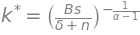

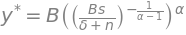

In [2]:
# Define symbols
n, s, B, k, kstar, ystar, alpha, delta = sm.symbols('n s B k k^* y^* alpha delta')

# Solow Equation for k
Solow_eq = sm.Eq(((s * B * k**alpha - (n + delta) * k) / (1 + n)), 0)

# Calculate steady-state value of k
k_ss = sm.solve(Solow_eq, k)[0]
steady_state_k = sm.Eq(kstar, k_ss)

# Calculate steady-state value of y
y = B * k**alpha
y_ss = y.subs(k, k_ss)
steady_state_y = sm.Eq(ystar, y_ss)

# Print the steady-state equations for k and y
display(steady_state_k)
display(steady_state_y)

So we see that the steady state value for capital per worker, $k^*$ and $y^*$, written more elegantly, is given as:

$k^*=B^{\frac{1}{1-\alpha}}\left(\frac{s}{n+\delta}\right)^{\frac{1}{1-\alpha}}$

$y^*=B^{\frac{1}{1-\alpha}}\left(\frac{s}{n+\delta}\right)^{\frac{\alpha}{1-\alpha}}$



In [3]:
# Convert the symbolic steady-state k solution into a Python function
k_ss_function = sm.lambdify((alpha, delta, B, n, s), k_ss)

Now, k_ss_function can be called with specific values for alpha, delta, B, n, and s.

We now move into defining reasonable parameters in our model, and printing the related values of $k^*$ and $y^*$

In [4]:
# Define model parameters using plausible empirical values
alpha = 1/3
n = 0.02
s = 0.35
B = 1
delta = 0.05

Now that we have set specific parameters for solving our model, we start to find specfik levels from our model at these parameter values.

In [5]:
# Compute the steady-state value for k using the parameter values
k_ss_value = k_ss_function(alpha, delta, B, n, s)

# Create and display the equation for the steady-state k with the computed value
steady_state_k_value = sm.Eq(kstar, k_ss_value)
sm.pprint(steady_state_k_value)

k__* = 11.1803398874989


In [6]:
# Compute the steady-state value for y using the steady-state k value
y_ss_value = B * k_ss_value**alpha

# Create the equation for the steady-state y with the computed value
steady_state_y_equation = sm.Eq(ystar, y_ss_value)
sm.pprint(steady_state_y_equation)

y__* = 2.23606797749979


## Numerical Solution

We now want to solve the model numerically and not analytically, so we use an optimizer to solve our model and we expect the reulsts to be the same as in the analytical solution.

In [7]:
def solow_steady_state_k(n: float, s: float, B: float, alpha: float, delta: float) -> float:
    """
    Finds the solow steady state for capital by using the bisect optimizer from module Scipy

    Args :
    alpha: Output elasticity wrt capital
    delta: Physical capital depreciation rate
    s    : savings rate
    n    : Population growth
    B    : Productivity parameter
    """

    # Define solow euqation
    solow_equation = lambda k: s * B * k**alpha - (n + delta) * k
    
    # optimize
    return optimize.bisect(solow_equation, 1, 100)

k_star = solow_steady_state_k(n, s, B, alpha, delta)
print(f'k* = {k_star:.3f}')

k* = 11.180


The solution is equal to the analytical solution, which implies that the $k^*$ and $y^*$ have the same computed values as in the analytical method.

We are now going to graphically visualize the solow diagram:

In [8]:
# Define function to plot Solow diagram
def plot_solow_diagram(k: int, n: float, s: float, B: int, alpha: float, delta: float, kt_xmax: int, kt_vline: float):
    # Calculate the growth rates of capital per capita and the diagonal line
    k_growth = [s * B * t**alpha for t in range(kt_xmax + 1)]
    diagonal = [(n + delta) * t for t in range(kt_xmax + 1)]

    # Calculate steady state capital per capita
    k_star = ((s*B)/(n+delta))**(1/(1-alpha))

    # Configure plot settings
    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(8, 6))
    plt.plot(k_growth, label=r'$sBk_t^{\alpha}$', color='darkorange')
    plt.plot(diagonal, label=r'$(n+\delta)k_t$', color='black')
    plt.axvline(x=k_star, linestyle='--', color='red', label=r'$k*$')
    plt.axvline(x=kt_vline, linestyle='--', color='green', label=r'$k_t$')
    plt.xlim(0, kt_xmax)
    plt.xlabel('Capital per capita, $k_t$')
    plt.ylabel('')
    plt.legend()
    plt.title('Figure 1: Solow Diagram')
    plt.grid(True)  # add grid
    
    # Add arrows to the plot
    arrow_len = abs(k_star - kt_vline)
    arrow_positions = [0.3, 0.6, 0.8, 0.9, 0.95, 1]
    
    # If kt_vline is to the left of k_star, flip the direction of the arrows
    if kt_vline < k_star:
        arrow_len = -arrow_len
        arrow_positions = [1 - pos for pos in arrow_positions]
    else:
        arrow_positions = [1 - pos for pos in arrow_positions]
    
    arrow_center = min(k_star, kt_vline) + abs(arrow_len) / 2
    
    # Add each arrow to the plot
    for pos in arrow_positions:
        arrow_x = arrow_center + arrow_len * (pos - 0.5)
        plt.annotate(
            '',
            xy=(kt_vline, 0), xycoords='data',
            xytext=(arrow_x, 0), textcoords='data',
            arrowprops=dict(
                arrowstyle="<-", color="black", lw=1, mutation_scale=15
            )
        )

    # Display the plot
    plt.show()

# Create an interactive widget to display the Solow diagram
widgets.interact(
    plot_solow_diagram,
    k=widgets.fixed(0),
    alpha=widgets.FloatSlider(description=r'α', min=0, max=0.9, step=0.05, value=0.3, layout=widgets.Layout(width='50%')),
    delta=widgets.FloatSlider(description=r'δ', min=0, max=0.1, step=0.01, value=0.01, layout=widgets.Layout(width='50%')),
    s=widgets.FloatSlider(description='s', min=0.01, max=0.8, step=0.05, value=0.4, layout=widgets.Layout(width='50%')),
    n=widgets.FloatSlider(description='n', min=0.01, max=0.1, step=0.005, value=0.01, layout=widgets.Layout(width='50%')),
    B=widgets.fixed(1),
    kt_xmax=widgets.IntSlider(description='k_t axis', min=1, max=100, step=10, value=100, layout=widgets.Layout(width='50%')),
    kt_vline=widgets.FloatSlider(description='k_t', min=0, max=100, step=0.1, value=20, layout=widgets.Layout(width='50%'))
)


interactive(children=(FloatSlider(value=0.01, description='n', layout=Layout(width='50%'), max=0.1, min=0.01, …

<function __main__.plot_solow_diagram(k: int, n: float, s: float, B: int, alpha: float, delta: float, kt_xmax: int, kt_vline: float)>

Under the stability condition $n+\delta >0$, the Solow Model implies that capital intensity converges to a specific level of capital as we specified before as $k^\star$. From the solow diagram we follow how the economy approaches $k^\star$ and thereby steady state. Starting from an initial position with $k<k^*$, the economy will grow, as capital pr capita grows due to investment in new capital exceeding depreciation of existing capital. The marginal product will diminish as we approach ss, so the growth rate is slower and slower the closer we get to ss. The higher savings rate or higher productivity means that we approach ss quicker, but higher fertility rate or depreciation rate contributes to a slower approach as capital per capita diminishes as population grows. 

Moving forward to an extended version of the basic Solow, now we introduce a genereal Solow Model with human capital.

## Solow Model with Human Capital

\begin{align}
Y_t&=K_t^\alpha H_t^{\varphi}\left(A_t L_t\right)^{1-\alpha-\varphi}, \tag{7} \\
r_t&=\alpha\left(\frac{K_t}{A_t L_t}\right)^{\alpha-1}\left(\frac{H_t}{A_t L_t}\right)^{\varphi}, \tag{8} \\
w_t&=(1-\alpha)\left(\frac{K_t}{A_t L_t}\right)^\alpha\left(\frac{H_t}{A_t L_t}\right)^{\varphi} A_t, \tag{9} \\
K_{t+1}-K_t&=s_K Y_t-\delta K_t, \tag{10} \\
H_{t+1}-H_t&=s_H Y_t-\delta H_t, \tag{11} \\
L_{t+1}&=(1+n) L_t, \tag{12} \\
A_{t+1}&=(1+g) A_t . \tag{13}
\end{align}


Where $\tilde k = \frac{K_t}{A_tL_t}$ and $\tilde h = \frac{h_t}{A_tL_t}$

In our extended Solow model our production depends on levels of physical capital, labour, productivity and now also human capital. Therefore, human capital is included in the terms for wage rate and interest rate, as these are derivatives of the production function. Also, human capital evolves like capital, being based on the level in the previous period and depreciating as people die and growing as people get educated. Now we also have a growth rate, g, which is growth in technology level. 

Now we once again want to determine the equations for steady state levels of capital and production.

In [9]:
#We define all symbols
k = sm.symbols('k') #physical capital
ktildestar = sm.symbols('ktilde^*') #physical capital in ss
ktilde = sm.symbols('ktilde') #physical capital per effective worker
htilde = sm.symbols('htilde') #human capital per effective worker
htildestar = sm.symbols('htilde^*') #Steady state human capital
h = sm.symbols('h') #human capital per worker
alpha = sm.symbols('alpha') #outputelasticity wrt physical capital
phi = sm.symbols('phi') #outputelasticity wrt human capital
delta = sm.symbols('delta') #depreciation rate on both human and physical capital
sh = sm.symbols('sh') #investment rate in human capital
sk = sm.symbols('sk') #investment rate in physical capital
g = sm.symbols('g') #Technology growth rate
n = sm.symbols('n') #Population growth

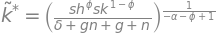

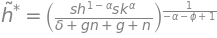

In [10]:
# Define the steady state equations
def solow_ktilde_eq(ktilde, htilde, sk, sh, alpha, phi, n, g, delta):
    return (sk * np.power(ktilde, alpha) * np.power(htilde, phi) - (n + g + delta + n * g) * ktilde)

def solow_htilde_eq(ktilde, htilde, sk, sh, alpha, phi, n, g, delta):
    return (sh * np.power(ktilde, alpha) * np.power(htilde, phi) - (n + g + delta + n * g) * htilde)

# Define the steady state expressions for ktilde and htilde
ktilde_ss_expr = (sk**(1-phi) * sh**phi / (n + g + delta + n * g))**(1/(1 - alpha - phi))
htilde_ss_expr = (sk**alpha * sh**(1-alpha) / (n + g + delta + n * g))**(1/(1 - alpha - phi))

steady_state_ktilde = sm.Eq(ktildestar, ktilde_ss_expr)
steady_state_htilde = sm.Eq(htildestar, htilde_ss_expr)

display(steady_state_ktilde, steady_state_htilde)

Now that we have the needed equations, we set values for our parameters, so we can calculate specfic values for our endogenous variables.

In [11]:
# Set the values for the parameters
sk_val = 0.4
sh_val = 0.3
alpha_val = 0.4
phi_val = 0.3
n_val = 0.02
g_val = 0.2
delta_val = 0.05

# Define the equations with the given values for the parameters
eq1 = lambda x: solow_ktilde_eq(x[0], x[1], sk_val, sh_val, alpha_val, phi_val, n_val, g_val, delta_val)
eq2 = lambda x: solow_htilde_eq(x[0], x[1], sk_val, sh_val, alpha_val, phi_val, n_val, g_val, delta_val)

# Initial guess for the solver
x0 = np.array([1, 1])

# Solve the equations
solution = optimize.fsolve(lambda x: [eq1(x), eq2(x)], x0)

# Display the steady-state values of ktilde and htilde
ktilde_ss, htilde_ss = solution
display((ktilde_ss, htilde_ss))

We now wish to make an interactive plot of the Solow diagram, including nullclines.

In [12]:
from ipywidgets import interact, FloatSlider

def plot_combinations(sk, sh, alpha, phi, n, g, delta):
    ktilde_ss = ((sk ** (1 - phi) * sh ** phi) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    htilde_ss = ((sk ** alpha * sh ** (1 - alpha)) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    
    ktilde_values = np.linspace(0.01, 2 * ktilde_ss, 100)
    htilde_values = np.linspace(0.01, 2 * htilde_ss, 100)
    
    Ktilde, Htilde = np.meshgrid(ktilde_values, htilde_values)
    
    delta_ktilde = (1 / ((1 + n) * (1 + g))) * (sk * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Ktilde)
    delta_htilde = (1 / ((1 + n) * (1 + g))) * (sh * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Htilde)
    
    plt.figure(figsize=(8, 8))
    plt.contour(Ktilde, Htilde, delta_ktilde, levels=[0], colors=['blue'])
    plt.contour(Ktilde, Htilde, delta_htilde, levels=[0], colors=['red']) 
    plt.plot([],[])
    
    plt.scatter(ktilde_ss, htilde_ss, color='green', marker='o', zorder=3)
    plt.annotate("E", (ktilde_ss, htilde_ss), textcoords="offset points", xytext=(-10, 5), fontsize=12, color='green', zorder=3)
    
    from matplotlib.lines import Line2D

    plt.xlabel('$\~{k}_t$')
    plt.ylabel('$\~{h}_t$')
    plt.title('Figure 2: Steady state combinations')

    custom_lines = [Line2D([0], [0], color="blue", lw=4),
                    Line2D([0], [0], color="red", lw=4),
                    Line2D([0], [0], marker='o', color="green", markersize=10)]

    #fig, ax = plt.subplots()
    #lines = ax.plot(data)
    plt.legend(custom_lines, ['$\Delta k_t=0$', '$\Delta h_t=0$','Equilibrium 1'])
    plt.xlim(0, 50)
    plt.ylim(0, 50)

    plt.grid()
    plt.show()

# Create sliders for each parameter
sk_slider = FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r's_K')
sh_slider = FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r's_H')
alpha_slider = FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'alpha')
phi_slider = FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'phi')
n_slider = FloatSlider(min=0, max=0.1, step=0.001, value=0.01, description=r'n')
g_slider = FloatSlider(min=0, max=0.1, step=0.001, value=0.02, description=r'g')
delta_slider = FloatSlider(min=0, max=0.1, step=0.001, value=0.05, description=r'delta')

# Create an interactive plot
interact(plot_combinations, sk=sk_slider, sh=sh_slider, alpha=alpha_slider, phi=phi_slider, n=n_slider, g=g_slider, delta=delta_slider);


interactive(children=(FloatSlider(value=0.3, description='s_K', max=0.9, min=0.1, step=0.01), FloatSlider(valu…

**Figure 2** has physical capital per effective worker along the x-axis and human capital per effective worker along the y-axis. The red curve represents the combinations of the two where $\Delta\tilde h_t=0$, and the blue curve represents the combinations for which $\Delta\tilde k_t=0$.

In the intersection of the two curves, both changes are equal to zero, implying a steady state combination. This is displayed at the green dot "E" in the plot.

For every combination that lies above the blue, there will be $\tilde k_{t+1} - \tilde k_t>0$ implying a positive growth in physical capital per effective worker, and opposite for when we are below.

For every combinations that lies to the right of the red curve, there will be $\tilde h_{t+1} - \tilde h_t>0$ implying a positive growth in human capital per effective worker and vice versa.

# Policy experiement: Permanently increasing the investment rate in human capital $s_H$

Now we would like to consider a policy change. If we, e.g., inforce that the government wishes to strengthen education, raising $s_H$ permanently, we get this diagram: 

In [13]:
from matplotlib.lines import Line2D

def plot_combinations_new(sk, sh, alpha, phi, n, g, delta):
    # steady state expressions to find intersections (such that they can be plotted)
    ktilde_ss = ((sk ** (1 - phi) * sh ** phi) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    htilde_ss = ((sk ** alpha * sh ** (1 - alpha)) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    ktildenew_ss = ((sk ** (1 - phi) * (sh * 1.3) ** phi) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    htildenew_ss = ((sk ** alpha * (sh * 1.3) ** (1 - alpha)) / (n + g + delta + n * g)) ** (1 / (1 - alpha - phi))
    
    # create grids
    ktilde_values = np.linspace(0.01, 2 * ktilde_ss, 100)
    htilde_values = np.linspace(0.01, 2 * htilde_ss, 100)
    Ktilde, Htilde = np.meshgrid(ktilde_values, htilde_values)
    
    # create null-clines
    delta_ktilde = (1 / ((1 + n) * (1 + g))) * (sk * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Ktilde)
    delta_htilde = (1 / ((1 + n) * (1 + g))) * (sh * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Htilde)
    delta_htildenew = (1 / ((1 + n) * (1 + g))) * (sh * 1.3 * Ktilde ** alpha * Htilde ** phi - (n + g + delta + n * g) * Htilde)

    # create the elements (curves, null clines) in the plot
    plt.figure(figsize=(8, 8))
    plt.contour(Ktilde, Htilde, delta_ktilde, levels=[0], colors=['blue'])
    plt.contour(Ktilde, Htilde, delta_htilde, levels=[0], colors=['red']) 
    plt.contour(Ktilde, Htilde, delta_htildenew, levels=[0], colors=['purple']) 
    plt.plot([],[],[])
    
    #SS Initial equilibrium
    plt.scatter(ktilde_ss, htilde_ss, color='green', marker='o', zorder=3)
    plt.annotate("E1", (ktilde_ss, htilde_ss), textcoords="offset points", xytext=(-10, 5), fontsize=12, color='green', zorder=3)
    
    #SS New equilibrium
    plt.scatter(ktildenew_ss, htildenew_ss, color='green', marker='o', zorder=3)
    plt.annotate("E2", (ktildenew_ss, htildenew_ss), textcoords="offset points", xytext=(-10, 5), fontsize=12, color='green', zorder=3)

    # labels and titles
    plt.xlabel('$\~{k}_t$')
    plt.ylabel('$\~{h}_t$')
    plt.title('Figure x: Increase in investment rate in human capital')

    # create legend
    custom_lines = [Line2D([0], [0], color="blue", lw=4),
                    Line2D([0], [0], color="red", lw=4),
                    Line2D([0], [0], color="purple", lw=4),
                    Line2D([0], [0], marker='o', color="green", markersize=10),
                    Line2D([0], [0], marker='o', color="green", markersize=10)]

        
    plt.legend(custom_lines, ['$\Delta k_t=0$', '$\Delta h_t=0$','$\Delta h^{new}_t=0$', 'Equilibrium 1', 'Equilibrium 2'])

    # axis borders
    plt.xlim(0, 50)
    plt.ylim(0, 50)

    # show plot
    plt.grid()
    plt.show()

# Create sliders for each parameter
sk_slider = FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r's_K')
sh_slider = FloatSlider(min=0.1, max=0.9, step=0.01, value=0.3, description=r's_H')
alpha_slider = FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'alpha')
phi_slider = FloatSlider(min=0, max=0.5, step=0.01, value=0.3, description=r'varphi')
n_slider = FloatSlider(min=0, max=0.1, step=0.001, value=0.01, description=r'n')
g_slider = FloatSlider(min=0, max=0.1, step=0.001, value=0.02, description=r'g')
delta_slider = FloatSlider(min=0, max=0.1, step=0.001, value=0.05, description=r'$\delta$')

# Create an interactive plot
interact(plot_combinations_new, sk=sk_slider, sh=sh_slider, alpha=alpha_slider, phi=phi_slider, n=n_slider, g=g_slider, delta=delta_slider);

interactive(children=(FloatSlider(value=0.3, description='s_K', max=0.9, min=0.1, step=0.01), FloatSlider(valu…

In the first period following the increase in $s_H$, due to more accumulated human capital per effective worker the income will have increased too, implying that the absolute investment in physical capital (fixed $s_K$ times the income) will have increased too. After one period with increased human capital, both physical and human capital will be increasing - even though the investment rate in phsycial capital has not changed.


### Concluding remarks

By developing a model that incorporates the main mechanisms that capture the impact of physical and human capital per worker on the productivity of labor, we conducted a policy experiment to examine the effect of increasing investment in human capital. The investment in human capital has cross-effects, which means that the increase not only led to a higher steady-state level of human capital per effective worker but also a higher level of physical capital per effective worker.

These implications demonstrate that an economy is highly responsive to investment rates, highlighting the importance of institutional frameworks that can effectively influence these rates and the need for expert analysis to determine what is best for the economy.